# Data Context
<!---
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**
--->

The data that I am working with is a dataset of chemicals structures. Some of these chemical structures are so-called Markush structures. The goal is to classify whether a structure is a Markush structure or not.

The data consists of 2D images of chemical structures and other written/drawn structures. The images are RGB, but in practice contains only black/white information. The context of the data is academic journals and patents, all of the images are excerpts from such publications. 

# Data Description

<!---**Present here the results of your exploratory data analysis. Note that there is no need to have a "story line" - it is more important that you show your understanding of the data and the methods that you will be using in your experiments (i.e. your methodology).**

**As an example, you could show data, label, or group balances, skewness, and basic characterizations of the data. Information about data frequency and distributions as well as results from reduction mechanisms such as PCA could be useful. Furthermore, indicate outliers and how/why you are taking them out of your samples, if you do so.**

**The idea is, that you conduct this analysis to a) understand the data better but b) also to verify the shapes of the distributions and whether they meet the assumptions of the methods that you will attempt to use. Finally, make good use of images, diagrams, and tables to showcase what information you have extracted from your data.** --->


The dataset consists of 2 classes: Markush and Non-Markush. The images containg a Markush structure are also annotated, giving information of the location of the Markush indicators. First we will load the annotated images and explore the statistics of the annotations.

In [1]:
import cv2
import os
from IPython.display import display, Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
NO_MARKUSH_ID = 0
MARKUSH_ID = 1

### Data Loading - Annotated Images

Loading the images which are annotated, and thus contain a Markush structure.

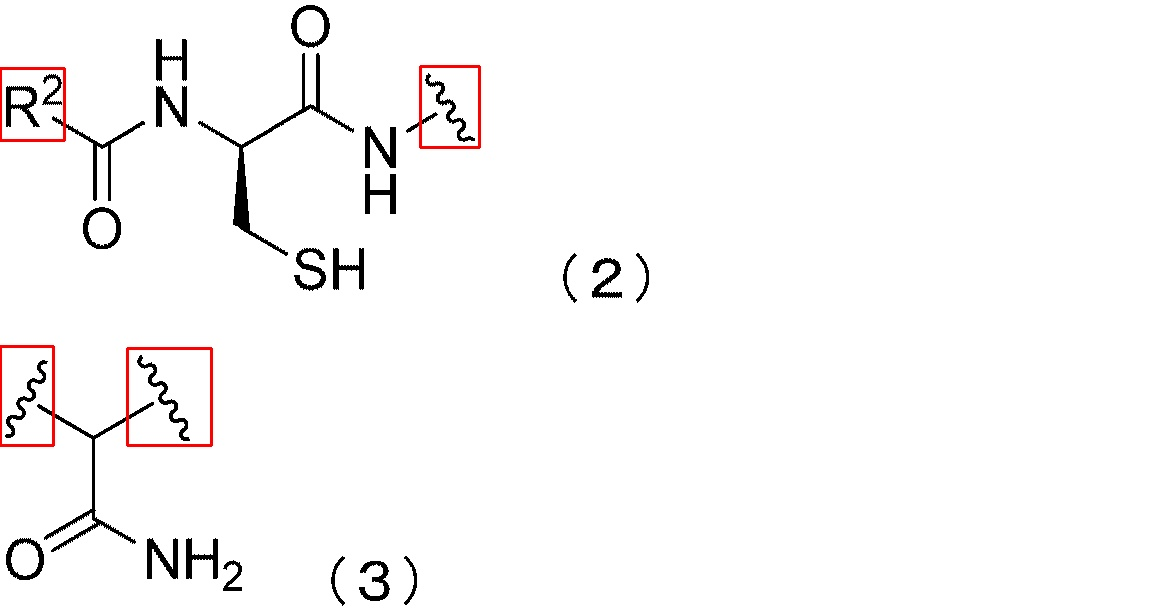

In [14]:
# Set the directories for the images and annotations
image_dir = "../data/Annotated Export/YOLO_Full_Export1/images/"
annot_dir = "../data/Annotated Export/YOLO_Full_Export1/labels/"

random_image = np.random.randint(len(os.listdir(image_dir)))

markush = pd.DataFrame()
markush_annotations = pd.DataFrame()

# Loop over all the images in the directory
for i, image_filename in enumerate(os.listdir(image_dir)):
    # Load the image
    image_path = os.path.join(image_dir, image_filename)
    image = cv2.imread(image_path)

    # Get the image dimensions
    height, width, _ = image.shape

    markush = markush.append({'image': image_filename,      # Image Name
                        'im_width': width,                  # Image Width in px
                        'im_height': height,                # Image Height in px
                        'class': MARKUSH_ID                 # Class ID of annotation
                        }, ignore_index = True)            

    # Load the annotations for the image
    annot_filename = os.path.splitext(image_filename)[0] + ".txt"
    annot_path = os.path.join(annot_dir, annot_filename)
    with open(annot_path, "r") as f:
        annotations = f.readlines()
    
    for annot in annotations:
        class_id, x, y, w, h = map(float, annot.split())
        markush_annotations = markush_annotations.append({'image': image_filename,         # Image Name
                        'im_width': width,               # Image Width in px
                        'im_height': height,             # Image Height in px
                        'class': MARKUSH_ID,             # Class ID of annotation
                        'annot_x_px': int(x*width),      # Annotation x center in px
                        'annot_y_px': int(y*height),     # Annotation y center in px
                        'annot_w_px': int(w*width),      # Annotation width in px
                        'annot_h_px': int(h*height)}     # Annotation height in px
                        , ignore_index = True)

    
    # Display one random labelled images as an example
    if i == random_image:
        # Draw bounding boxes on the image
        for annot in annotations:
            class_id, x, y, w, h = map(float, annot.split())
            x1 = int((x - w / 2) * width)
            y1 = int((y - h / 2) * height)
            x2 = int((x + w / 2) * width)
            y2 = int((y + h / 2) * height)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
            
        # Display the image with bounding boxes
        _, jpeg = cv2.imencode('.jpg', image)
        display(Image(data=jpeg.tobytes()))

       


In [4]:
markush_annotations

,image,im_width,im_height,class,annot_x_px,annot_y_px,annot_w_px,annot_h_px
0,82f2d26b-Markush67.PNG,769.0,481.0,1.0,154.0,295.0,42.0,31.0
1,82f2d26b-Markush67.PNG,769.0,481.0,1.0,308.0,298.0,42.0,26.0
2,82f2d26b-Markush67.PNG,769.0,481.0,1.0,230.0,221.0,15.0,47.0
3,82f2d26b-Markush67.PNG,769.0,481.0,1.0,375.0,298.0,33.0,28.0
4,82f2d26b-Markush67.PNG,769.0,481.0,1.0,448.0,222.0,20.0,39.0
...,...,...,...,...,...,...,...,...
1557,453fe5ff-Markush83.PNG,1224.0,115.0,1.0,696.0,59.0,84.0,21.0
1558,453fe5ff-Markush83.PNG,1224.0,115.0,1.0,876.0,55.0,69.0,29.0
1559,453fe5ff-Markush83.PNG,1224.0,115.0,1.0,1081.0,55.0,70.0,29.0
1560,7aebabf8-Markush35.PNG,262.0,232.0,1.0,228.0,47.0,65.0,95.0


### Analysis
 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

In [5]:
# How many annotations does each image have on average?
markush_annotations['image'].count()/markush_annotations['image'].nunique()

9.524390243902438

In [6]:
# What is the description of all the columns?

markush_annotations.describe()

,im_width,im_height,class,annot_x_px,annot_y_px,annot_w_px,annot_h_px
count,1562.000000,1562.000000,1562.0,1562.000000,1562.000000,1562.000000,1562.000000
mean,1047.850832,687.031370,1.0,472.229193,315.289373,48.965429,44.764405
std,365.969831,453.072698,0.0,358.112920,325.595249,32.241483,38.343597
min,160.000000,66.000000,1.0,8.000000,10.000000,3.000000,0.000000
25%,785.000000,319.000000,1.0,170.500000,77.000000,28.000000,25.000000
50%,1136.000000,578.000000,1.0,408.000000,202.000000,41.000000,37.000000
75%,1231.000000,998.000000,1.0,699.750000,442.000000,59.000000,53.000000
max,1986.000000,2464.000000,1.0,1954.000000,2449.000000,359.000000,609.000000


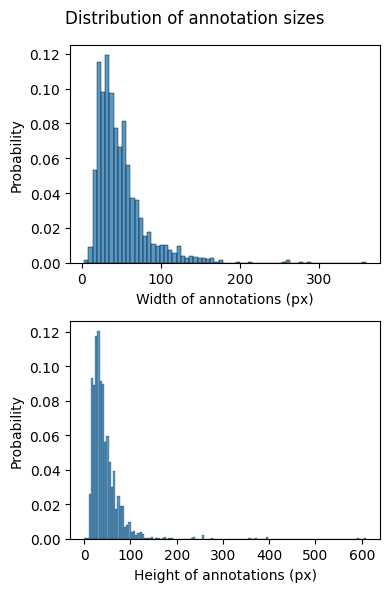

In [7]:
# Let's get an overview of the distribution of columns
plt.rcParams['figure.figsize'] = [4, 6]

fig, ax = plt.subplots(2,1)

sns.histplot(markush_annotations['annot_w_px'], ax=ax[0], cumulative=False, stat='probability')
sns.histplot(markush_annotations['annot_h_px'], ax=ax[1], cumulative=False, stat='probability')
fig.suptitle('Distribution of annotation sizes')
ax[0].set_xlabel('Width of annotations (px)')
ax[1].set_xlabel('Height of annotations (px)')
plt.tight_layout()

plt.show()

We can see that almost all annotations are below 200 pixels wide or high. This can help us make an informed decision about later processing of the data. For example, data can be generated by centering on or near an annotation, and cropping on this area. If the crop is more than 174x174 pixels, almost all annotations (99%) would be included:

In [8]:
print(markush_annotations['annot_w_px'].quantile(q=0.99))
print(markush_annotations['annot_h_px'].quantile(q=0.99))

160.16999999999962
173.77999999999975


### Data Loading - No Markush Structure

Loading the images which are not annotated, and do not contain a Markush structure

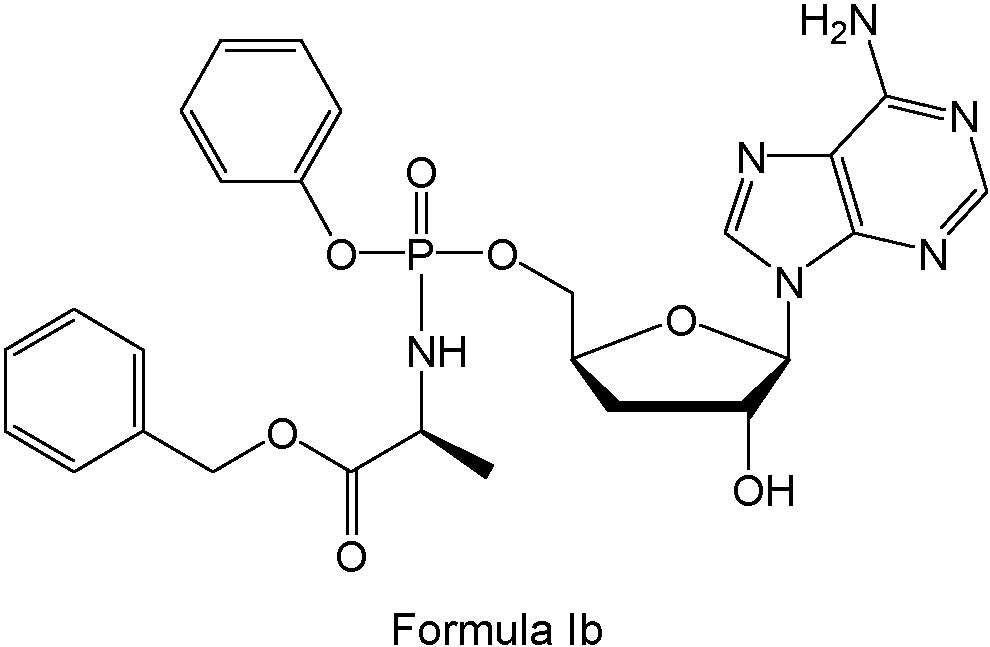

In [10]:
# Set the directories for the images and annotations
image_dir = "../data/training/NoMarkush"

random_image = np.random.randint(len(os.listdir(image_dir)))

no_markush = pd.DataFrame()

# Loop over all the images in the directory
for i, image_filename in enumerate(os.listdir(image_dir)):

    # Load the image
    image_path = os.path.join(image_dir, image_filename)
    image = cv2.imread(image_path)

    # Get the image dimensions
    height, width, _ = image.shape
    
    no_markush = no_markush.append({'image': image_filename,    # Image Name
                    'im_width': width,                          # Image Width in px
                    'im_height': height,                        # Image Height in px
                    'class': NO_MARKUSH_ID}                  # Class ID of annotation
                    , ignore_index=True)

    
    # Display one random labelled images as an example
    if i == random_image:
        # Display the image
        _, jpeg = cv2.imencode('.jpg', image)
        display(Image(data=jpeg.tobytes()))

       


In [11]:
no_markush.describe()

,im_width,im_height,class
count,108.000000,108.000000,108.0
mean,1059.398148,751.870370,0.0
std,543.650295,700.134968,0.0
min,280.000000,88.000000,0.0
25%,649.750000,324.000000,0.0
50%,845.500000,485.500000,0.0
75%,1523.250000,752.250000,0.0
max,2472.000000,2913.000000,0.0


# Comparing Dataset according to Class

In [12]:
fulldata = markush.append(no_markush)
fulldata

,image,im_width,im_height,class
0,82f2d26b-Markush67.PNG,769.0,481.0,1.0
1,2bfeed09-Markush34.PNG,1099.0,196.0,1.0
2,b953ca76-Markush51.PNG,1328.0,578.0,1.0
3,cdfedf7b-Markush1.PNG,407.0,365.0,1.0
4,3d62fe9d-Markush77.PNG,1116.0,228.0,1.0
...,...,...,...,...
103,NoMarkush71.png,1089.0,315.0,0.0
104,NoMarkush13.png,827.0,542.0,0.0
105,NoMarkush36.PNG,1914.0,2180.0,0.0
106,NoMarkush29.PNG,1934.0,2815.0,0.0


164 108  Ratio: 0.6585365853658537


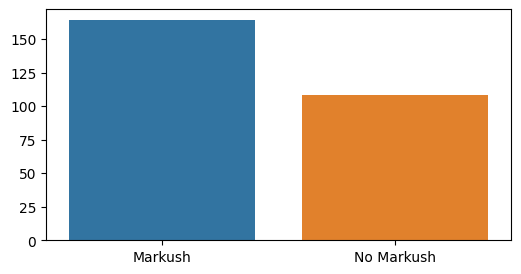

In [13]:
plt.rcParams['figure.figsize'] = [6, 3]

sns.barplot(x=['Markush', 'No Markush'], y=[len(markush), len(no_markush)])

print(len(markush), len(no_markush), f" Ratio: {len(no_markush)/len(markush)}")

As we can see, the data is not completely balanced. The ratio of Markush/No Markush images is roughly 65%. This means that this is also the baseline for our classifier: if we guess all images to contain a Markush structure we will achieve an accuracy of 65%.